In [2]:
from PIL import Image
import numpy as np

In [10]:
image = Image.open('catflower.jpg')
image.show()

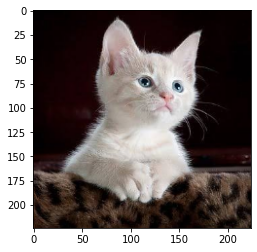

In [9]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('images.jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
image = imageio.imread('cat.jpeg')
f = open('cat.txt' , 'r')

values = f.readline()
splitted = values.split()
xMin = int(splitted[0])
yMin = int(splitted[1])
xMax = int(splitted[2])
yMax = int(splitted[3])
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=xMin, x2=xMax, y1=yMin, y2=yMax)
], shape=image.shape)
ia.imshow('cat.jpeg')

<h2> true image size vs imageView </h2>

In [38]:
image = imageio.imread('images.jpeg')
print('images')
print(image.shape)
print("imageView: 1129, 1080")
image = imageio.imread('cat.jpeg')
print('cat')
print(image.shape)
print("imageView: 1212, 1080")
image = imageio.imread('catflower.jpg')
print('catflower')
print(image.shape)
print("imageView: 1080, 1080")

images
(340, 325, 3)
imageView: 1129, 1080
cat
(587, 523, 3)
imageView: 1212, 1080
catflower
(3609, 3609, 3)
imageView: 1080, 1080


(340, 325, 3)


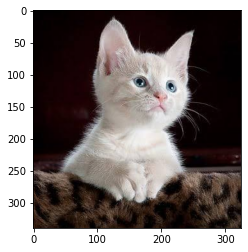

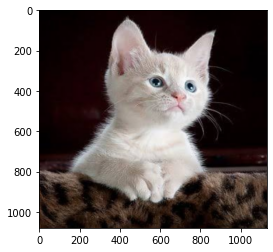

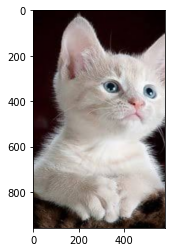

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('images.jpeg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1129, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 817-236
h = 978-19

cropped_image = image_resized[19:19+h, 236:236+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)



(587, 523, 3)


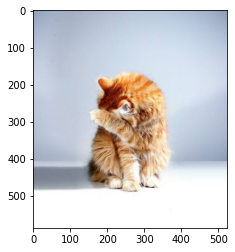

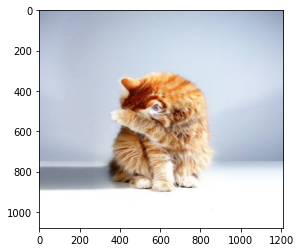

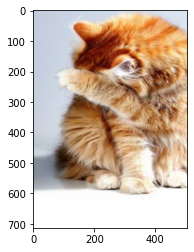

In [9]:
image = cv2.imread('cat.jpeg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1212, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 780-274
h = 1011-298

cropped_image = image_resized[298:298+h, 274:274+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)

(3609, 3609, 3)


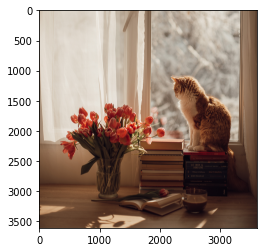

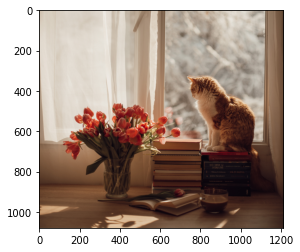

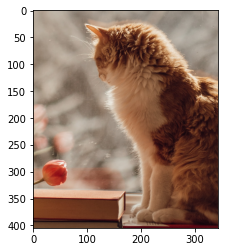

In [10]:
image = cv2.imread('catflower.jpg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1212, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 980-636
h = 709-304

cropped_image = image_resized[304:304+h, 636:636+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)